In [53]:
import pandas as pd
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
import yfinance as yf
from pathlib import Path

In [20]:
trading_days_year = 252
total_days_year = 365
thirty_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 30)).date()
ten_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 10)).date()
five_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 5)).date()
three_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 3)).date()
one_year = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 1)).date()
six_months = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year / 2)).date()
yesterday = (pd.Timestamp.today() - pd.Timedelta(days = 1)).date()

In [21]:
def get_close(start, end, tickers = 'spy', interval = '1d'):
    
    if len(tickers) < 5:
        df = yf.Ticker(tickers)
        data = df.history(start=start, end=end, interval = interval)
        data = data['Close']
        data = data.rename(tickers)
    else:
        df = yf.Tickers(tickers)
        data = df.history(start=start, end=end, interval = interval)
        data = data['Close']  
        
    data.index = data.index.date
    return data

In [27]:
df = get_close(thirty_years_ago, yesterday)

In [42]:
df = pd.DataFrame(df)

In [30]:
df.columns = ['close']

In [32]:
df.hvplot()

:Curve   [index]   (close)

In [34]:
df.reset_index(inplace=True)

In [35]:
df.columns = ['ds', 'y']

In [39]:
df.dropna(inplace=True)

In [43]:
df['ds'] = pd.to_datetime(df['ds'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7548 entries, 0 to 7547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7548 non-null   datetime64[ns]
 1   y       7548 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.1 KB


In [52]:
df.to_csv('data.csv', index= False)

In [82]:
df = pd.read_csv(Path('data.csv'), index_col='ds', infer_datetime_format=True, parse_dates=True)

In [83]:
df = df.pct_change()

In [84]:
df.reset_index(inplace=True)

In [86]:
df.dropna(inplace=True)

In [87]:
df

,ds,y
1,1993-06-15,-0.002082
2,1993-06-16,0.002086
3,1993-06-17,0.003469
4,1993-06-18,-0.008235
5,1993-06-21,0.002107
...,...,...
7543,2023-05-26,0.012951
7544,2023-05-30,0.000381
7545,2023-05-31,-0.005545
7546,2023-06-01,0.009501


In [88]:
m = Prophet()

In [89]:
m.fit(df)

20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
f = m.make_future_dataframe(periods=1000, freq='D')

In [91]:
f

,ds
0,1993-06-15
1,1993-06-16
2,1993-06-17
3,1993-06-18
4,1993-06-21
...,...
8542,2026-02-22
8543,2026-02-23
8544,2026-02-24
8545,2026-02-25


In [92]:
forecast = m.predict(f)

In [93]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-06-15,0.000323,-0.015250,0.015610,0.000323,0.000323,-0.000112,-0.000112,-0.000112,0.000785,0.000785,0.000785,-0.000898,-0.000898,-0.000898,0.0,0.0,0.0,0.000211
1,1993-06-16,0.000323,-0.015727,0.014646,0.000323,0.000323,-0.000389,-0.000389,-0.000389,0.000536,0.000536,0.000536,-0.000925,-0.000925,-0.000925,0.0,0.0,0.0,-0.000065
2,1993-06-17,0.000323,-0.017079,0.015978,0.000323,0.000323,-0.000665,-0.000665,-0.000665,0.000266,0.000266,0.000266,-0.000932,-0.000932,-0.000932,0.0,0.0,0.0,-0.000342
3,1993-06-18,0.000323,-0.016991,0.014441,0.000323,0.000323,-0.000504,-0.000504,-0.000504,0.000415,0.000415,0.000415,-0.000919,-0.000919,-0.000919,0.0,0.0,0.0,-0.000181
4,1993-06-21,0.000322,-0.015739,0.015670,0.000322,0.000322,-0.000367,-0.000367,-0.000367,0.000402,0.000402,0.000402,-0.000768,-0.000768,-0.000768,0.0,0.0,0.0,-0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,2026-02-22,0.000159,-0.017928,0.013154,0.000142,0.000174,-0.002356,-0.002356,-0.002356,-0.001202,-0.001202,-0.001202,-0.001153,-0.001153,-0.001153,0.0,0.0,0.0,-0.002197
8543,2026-02-23,0.000159,-0.015125,0.014803,0.000142,0.000174,-0.000845,-0.000845,-0.000845,0.000402,0.000402,0.000402,-0.001247,-0.001247,-0.001247,0.0,0.0,0.0,-0.000686
8544,2026-02-24,0.000159,-0.015923,0.015484,0.000142,0.000174,-0.000534,-0.000534,-0.000534,0.000785,0.000785,0.000785,-0.001319,-0.001319,-0.001319,0.0,0.0,0.0,-0.000375
8545,2026-02-25,0.000159,-0.016860,0.013523,0.000142,0.000174,-0.000832,-0.000832,-0.000832,0.000536,0.000536,0.000536,-0.001368,-0.001368,-0.001368,0.0,0.0,0.0,-0.000674


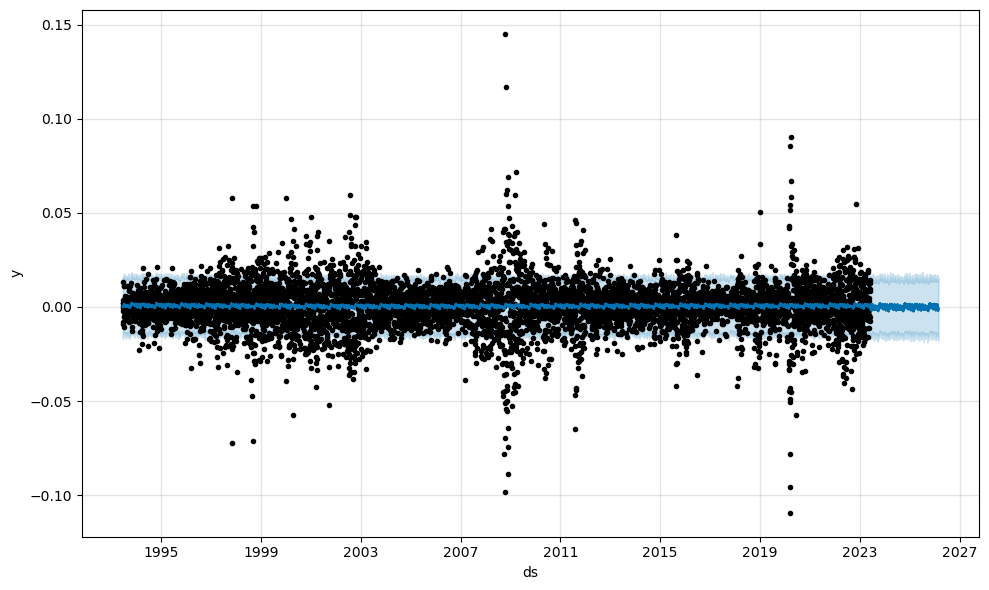

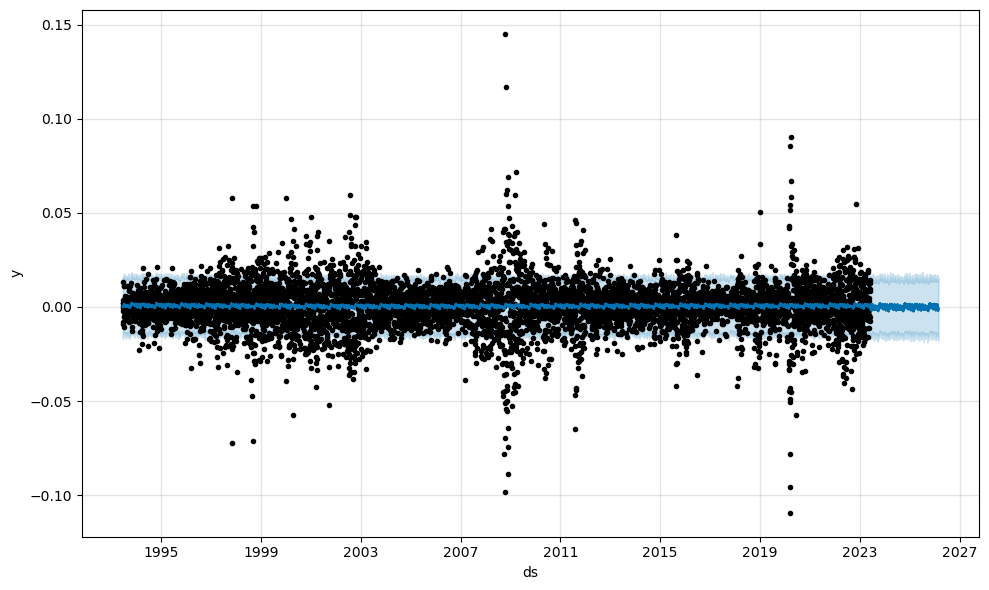

In [94]:
m.plot(forecast)

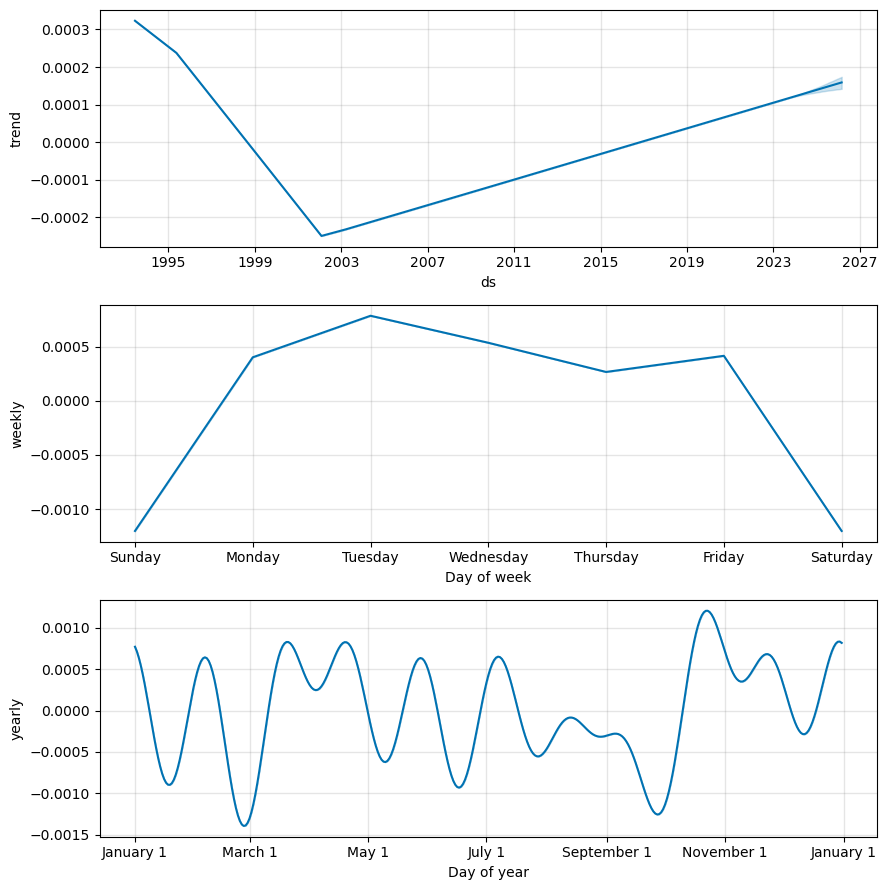

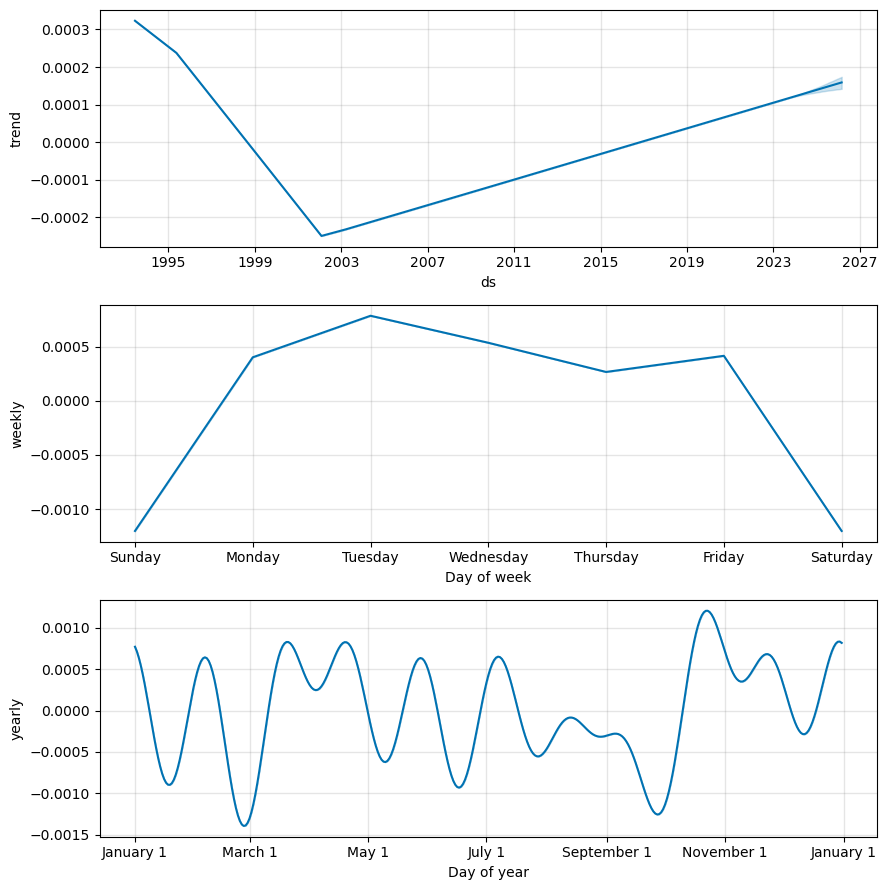

In [95]:
m.plot_components(forecast)